# Custom NumPy Profiling
Analyzing various steps in a custom semantic search implementation using NumPy.

In [1]:
import numpy as np

from datasets import load_dataset
from sentence_transformers import SentenceTransformer

import jmagics

In [2]:
texts = load_dataset("Sreenath/million-text-embeddings", split="test")[:10_000]['text']
model = SentenceTransformer('all-mpnet-base-v2')

K=5

## Step 1: Embedding

In [3]:
%%duration EMBEDDING
embeddings = model.encode(texts)

Duration:  13.9 s


## Step 2: Normalize

In [4]:
%%duration NORMALIZE
embeddings_norm = embeddings/np.linalg.norm(embeddings, axis=1, keepdims=True)

Duration:  5.81 ms


In [5]:
query_norm = embeddings_norm[99]

## Step 3: Similarity calculation

In [6]:
%%duration CALCULATE_SIMILARITY
cos_sims = np.dot(embeddings_norm, query_norm)

Duration:  375 μs


## Step 4: Top-K Extraction

In [7]:
%%duration GET_TOP
top_indexes = np.argsort(cos_sims)[-K:][::-1]

Duration:  528 μs


In [8]:
top_indexes, cos_sims[top_indexes], [texts[i] for i in top_indexes]

(array([  99, 5873, 7076, 1642, 5547]),
 array([1.        , 0.5824195 , 0.52046716, 0.51989347, 0.49409178],
       dtype=float32),
 ['Google Analytics generates statistical and other information about website use by means of cookies, which are stored on computers of users.',
  'Cookies are pieces of information that a website transfers to your hard drive to store and sometimes track information about you.',
  'Cookies are little text files saved by your browser and thus stored on your computer.',
  'The number of visitors a Web site receives.',
  'Tracking technologies also used are, tags, and scripts to collect and track information and to improve and analyze our Service.'])

## Results

Corpus size: 10000
Linear Scale:


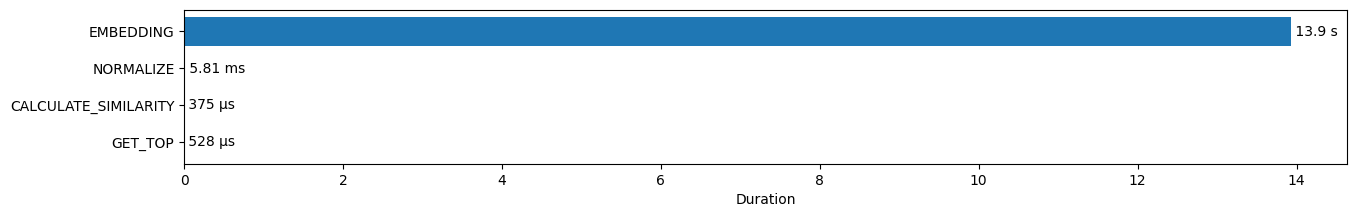


Logarithmic Scale:


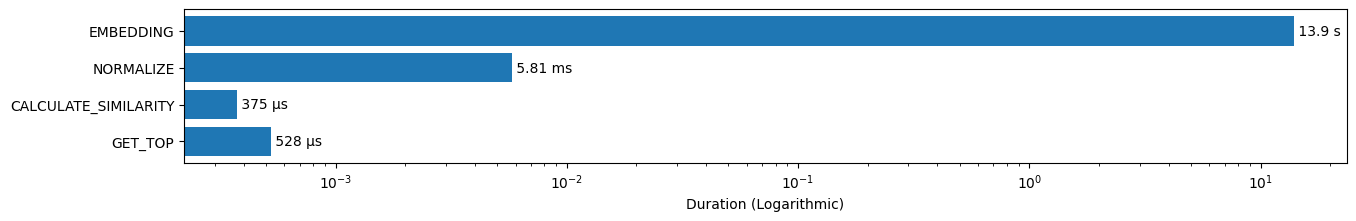


System Information:
-------------------
Processor: Apple M3 Max
Architecture: ARM_8
Bits: 64
Uname: Darwin
Cores (Logical): 16
Cores (Physical): 16
Total RAM: 128.0 GB
GPU information not available.


In [9]:
print("Corpus size:", len(embeddings))

print("Linear Scale:")
%plot_durations

print("Logarithmic Scale:")
%plot_durations log

%print_sysinfo